### Imports

In [ ]:
!pip install -r ./../requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from data_management import data_loading, random_sampling, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes
from model_evaluation import evaluate_classifiers, evaluation_pipeline, get_number_of_samples_table


np.random.seed(777)

### Data loading

In [2]:
energy_threshold = 0.75
use_cone = True

manip_features = data_loading('cwt', energy_threshold, use_cone)

### Select Manipulation Category

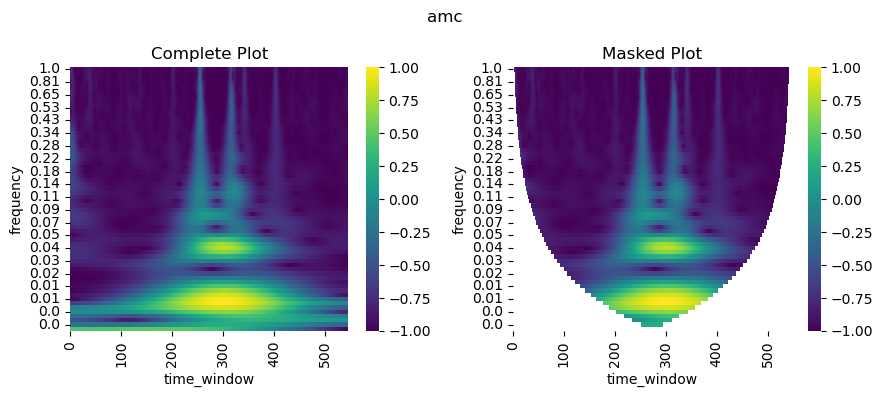

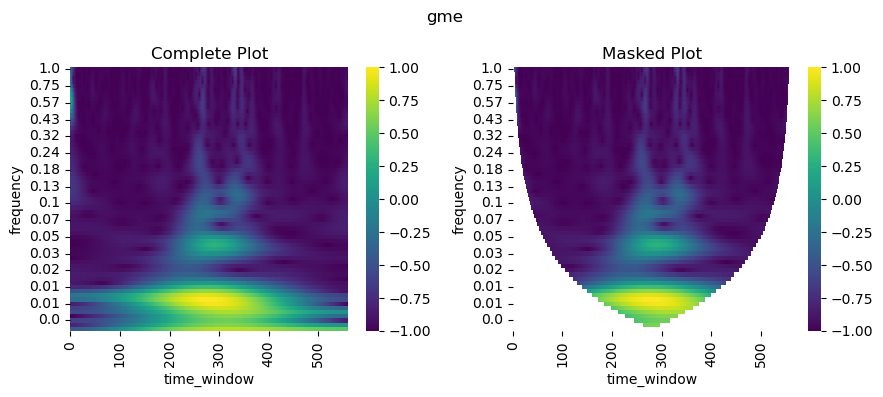

In [3]:
manip_category = 'pump_and_dump'

manip_stocks_dict = manip_features[manip_category]
for stock, stock_features in manip_stocks_dict.items():
    feature_matrix = stock_features['feature_matrix']
    color_plot(feature_matrix, 1, 5, use_cone, stock, mask_index=6)

In [4]:
stock = 'gme'
plot_against = 'frequency'
hue_var = 'target'
feature_matrix = manip_stocks_dict[stock]['feature_matrix']

plot3d_dataset(feature_matrix, stock, plot_against, hue_var, target_var=feature_matrix[:, -1])

### Random Sampling and Splitting

In [5]:
X_train_all, y_train, X_val_all, y_val, X_test_all, y_test = joint_random_sampling(manip_stocks_dict, 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, [1, 2, 3]]
X_val = X_val_all[:, [1, 2, 3]]
X_test = X_test_all[:, [1, 2, 3]]

### Distribution Visualization

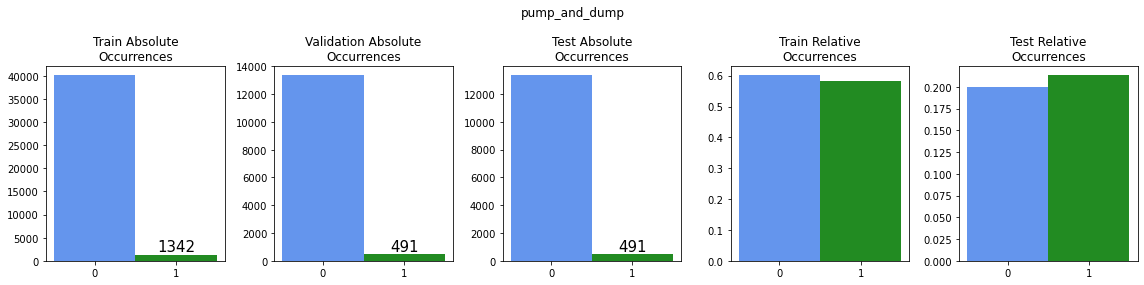

In [6]:
plot_target_classes(y_train, y_val, y_test, manip_category)

In [7]:
stock = 'curr'
plot_against = 'frequency'
hue_var = 'target'

plot3d_dataset(X_test_all, stock, plot_against, hue_var, target_var=y_test)

### Model Benchmarking

In [8]:
gen_train_error_pair = [(0.1, 0.05), (0.05, 0.025), (0.015, 0.0075)]

get_number_of_samples_table(gen_train_error_pair, 3, depth=3, pol_degree=3)

logistic_regression  svm_linear  svm_polynomial  svm_rbf  \
(epsilon, delta)                                                             
(0.1, 0.05)                      44.0        44.0            54.0      inf   
(0.05, 0.025)                   102.0       102.0           122.0      inf   
(0.015, 0.0075)                 419.0       419.0           487.0      inf   

                  decision_tree  
(epsilon, delta)                 
(0.1, 0.05)               766.0  
(0.05, 0.025)            3159.0  
(0.015, 0.0075)         36949.0

In [9]:
sampling_mode = 'joint'
distribution = 'uniform'

classifiers = ['logistic_regression', 'svm_linear', 'svm_polynomial', 'decision_tree', 'svm_rbf']
depth = 3
pol_degree = 3

In [10]:
gen_error, train_error = gen_train_error_pair[0]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.06370348921384103% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.032, Val error 0.031039879434268492, Test error 0.03568421358264859
Label 1.0 -> Train error 0.032, Val error 0.031039879434268492, Test error 0.03568421358264859
0.06370348921384103% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.032, Val error 0.03364827266403895, Test error 0.033071049040387906
Label 1.0 -> Train error 0.032, Val error 0.03364827266403895, Test error 0.033071049040387906
0.07818155494425945% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
svm_polyno

In [11]:
gen_error, train_error = gen_train_error_pair[1]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.14767627045026785% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.024, Val error 0.03289473684210526, Test error 0.03385499840306611
Label 1.0 -> Train error 0.024, Val error 0.03289473684210526, Test error 0.03385499840306611
0.14767627045026785% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.056, Val error 0.033503361929051706, Test error 0.03312911936354926
Label 1.0 -> Train error 0.056, Val error 0.033503361929051706, Test error 0.03312911936354926
0.1766324019111047% are required. The training procedure is adequate.
125 of the data are used for training.
34504 of the data are used for validation.
34441 of the data are used for testing.
svm_polynomia

In [12]:
gen_error, train_error = gen_train_error_pair[2]

for classifier in classifiers:

    _ = evaluation_pipeline(manip_stocks_dict, 3, classifier, gen_error, train_error, sampling_mode,
                                    depth=depth, distribution=distribution, pol_degree=pol_degree)

0.6066309541045316% are required. The training procedure is adequate.
500 of the data are used for training.
34316 of the data are used for validation.
34254 of the data are used for testing.
logistic_regression
Label 0.0 -> Train error 0.034, Val error 0.03246299102459494, Test error 0.03424417586267297
Label 1.0 -> Train error 0.034, Val error 0.03246299102459494, Test error 0.03424417586267297
0.6066309541045316% are required. The training procedure is adequate.
500 of the data are used for training.
34316 of the data are used for validation.
34254 of the data are used for testing.
svm_linear
Label 0.0 -> Train error 0.03, Val error 0.033074950460426626, Test error 0.033689496117241785
Label 1.0 -> Train error 0.03, Val error 0.033074950460426626, Test error 0.033689496117241785
0.7050818010713769% are required. The training procedure is adequate.
500 of the data are used for training.
34316 of the data are used for validation.
34254 of the data are used for testing.
svm_polynomial


In [28]:
classifiers_dict = {
    'decision_tree': DecisionTreeClassifier(max_depth=3),
    'svm_linear': SVC(kernel='linear'),
    'svm_poly': SVC(kernel='poly', degree=2),
    'svm_rbf': SVC(kernel='rbf'),
    'logistic_regression': LogisticRegression()
}

classifiers_errors = evaluate_classifiers(classifiers_dict, X_train, y_train, X_val, y_val, X_test, y_test)

decision_tree
Label 0.0 -> Train error 0.0008428776835738014, Val error 0.001775410563692854, Test error 0.0010524733122838671
Label 1.0 -> Train error 0.0008428776835738014, Val error 0.001775410563692854, Test error 0.0010524733122838671
svm_linear
Label 0.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
Label 1.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
svm_poly
Label 0.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
Label 1.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
svm_rbf
Label 0.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
Label 1.0 -> Train error 0.001140363924835143, Val error 0.001035656162154165, Test error 0.0009021199819576004
logistic_regression
Label 0.0 -> Train error 0.0011403639248